In [1]:
import sys
import copy
sys.path.insert(0, "../../")
from classes.calculators.lennardjones import LennardJones
from classes.atom_classes.atom import Atom
from classes.atom_classes.atom_collection import Atom_Collection
from classes.atom_classes.atom_collection_plotter import Atom_Collection_Plotter, Animator
from classes.atom_classes.atom_file_handler import Atom_File_handler
from classes.optimizers.md_simulator1 import MDT_simulator
from classes.optimizers.random_struct_search import Line_searcher1
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [2]:
class MD_animator(Animator):
    def __init__(self, 
                 e_line,
                 default_cols=("C0", "C1"), markersize=50, scale_with_mass=False, alpha=1) -> None:
        super().__init__(default_cols, markersize, scale_with_mass, alpha)
        self.e_line = e_line

    def animate(self, i, atom_col, position, energies):
        cm_pos = np.mean(position,axis=0)
        #print("hov")
        atom_col.set_atom_positions(position-cm_pos)
        plot_elems = self(atom_col)
        xs = np.linspace(0, i, i)
        self.e_line.set_data(xs, energies[:i])
        return plot_elems["atoms"] + [self.e_line]

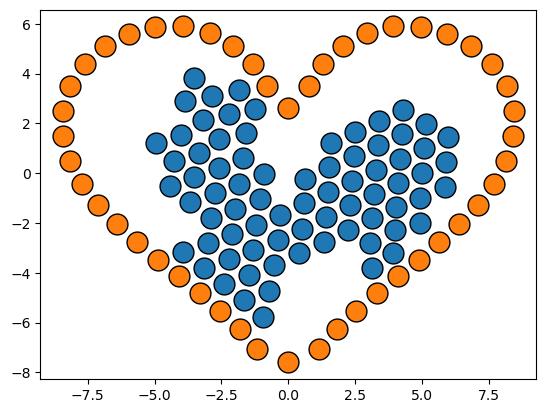

In [3]:
fig, ax = plt.subplots()

atom_writer = Atom_File_handler()
opt_col = atom_writer.load_atom_collections("relaxed_atom_col")[0]

animator = MD_animator(markersize=15, e_line=None)

opt_col.reset_plot_axes()
s = animator(atom_col=opt_col, ax=ax)

In [10]:
temps = [0.05, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0]

atomcol_for_heat_up = atom_writer.load_atom_collections(filename="relaxed_atom_col1")[-1]
md_simulator = MDT_simulator(atom_col=atomcol_for_heat_up, temp=0.05)
for temp in temps:
    md_simulator.temp=temp
    md_simulator.run_MDsimulation(N_steps=500)
    atom_writer.save_atom_collections(md_simulator.logged_atom_cols, filename=f"saved_atom_cols/T{temp}sim")
    atomcol_for_heat_up = md_simulator.logged_atom_cols[-1]
    md_simulator = MDT_simulator(atom_col=atomcol_for_heat_up, temp=temp)